# Aim:
1)To prepare a classification model using Naive Bayes for salary data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB
%matplotlib inline

In [2]:
train = pd.read_csv('SalaryData_Train.csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test = pd.read_csv('SalaryData_Test.csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## EDA

In [4]:
# Train data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
train.describe(include='all')

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161,30161,30161.000000,30161,30161,30161,30161,30161,30161.000000,30161.000000,30161.000000,30161,30161
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22285,9840,NaN,14065,4038,12463,25932,20380,NaN,NaN,NaN,27504,22653
mean,38.438115,NaN,NaN,10.121316,NaN,NaN,NaN,NaN,NaN,1092.044064,88.302311,40.931269,NaN,NaN
std,13.134830,NaN,NaN,2.550037,NaN,NaN,NaN,NaN,NaN,7406.466611,404.121321,11.980182,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


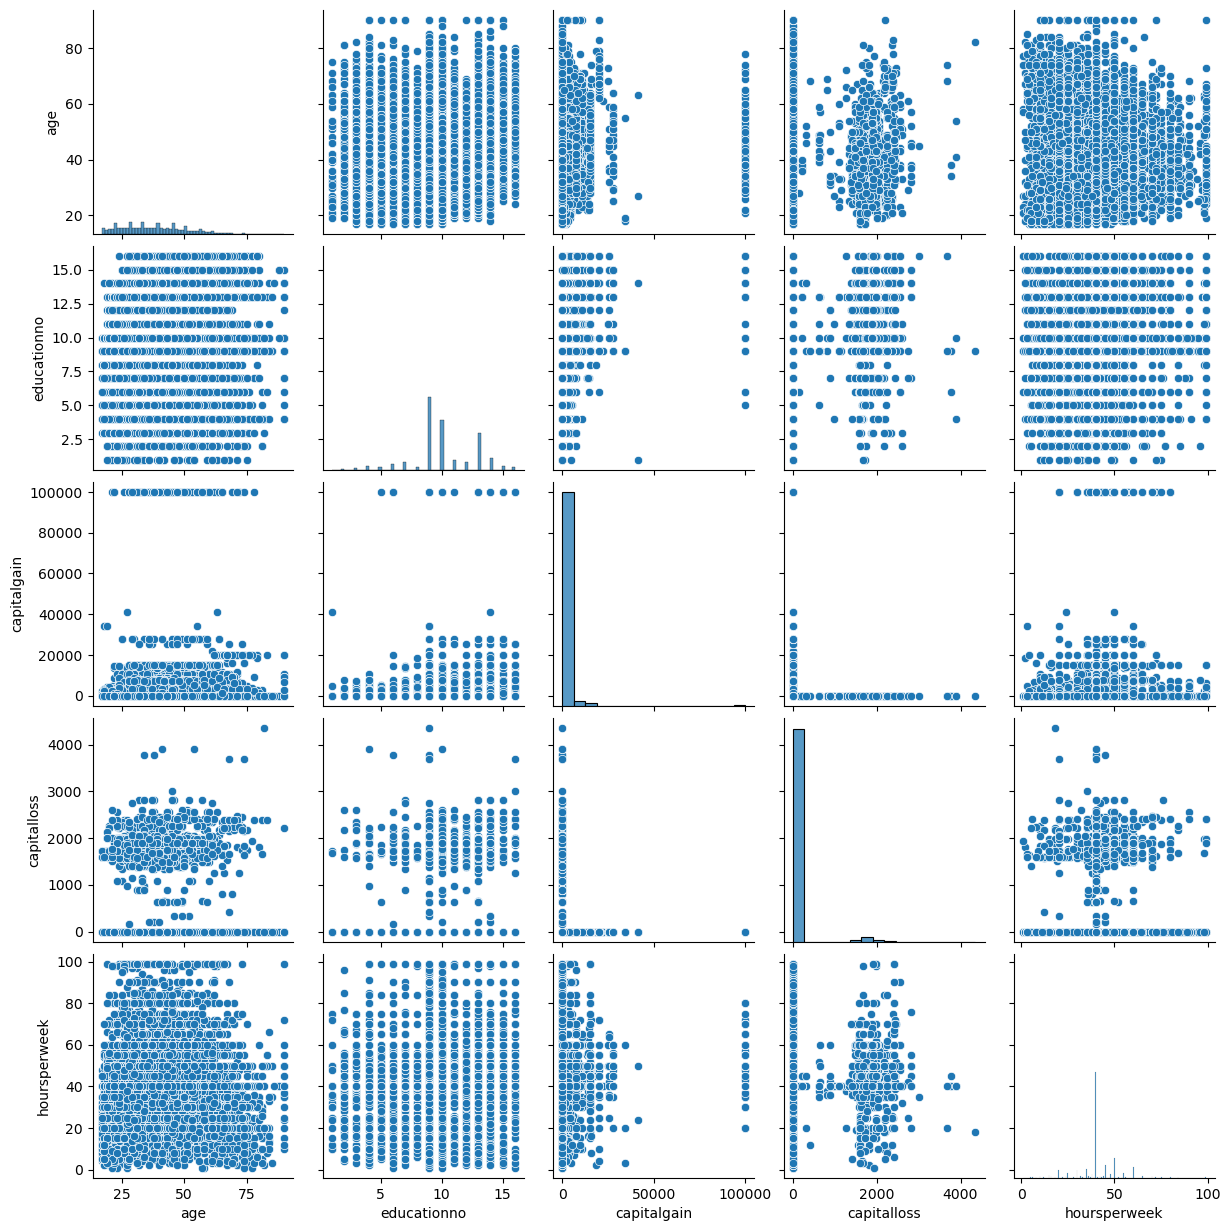

In [7]:
sns.pairplot(train)

In [8]:
train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

<Axes: xlabel='Salary', ylabel='count'>

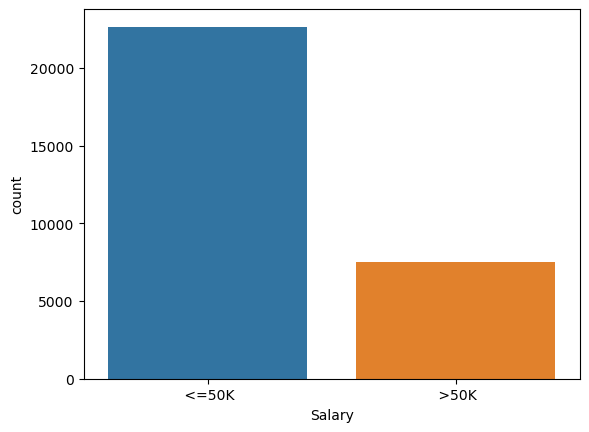

In [10]:
sns.countplot(x=train['Salary'])

array([<Axes: title={'center': ' <=50K'}>,
       <Axes: title={'center': ' >50K'}>], dtype=object)

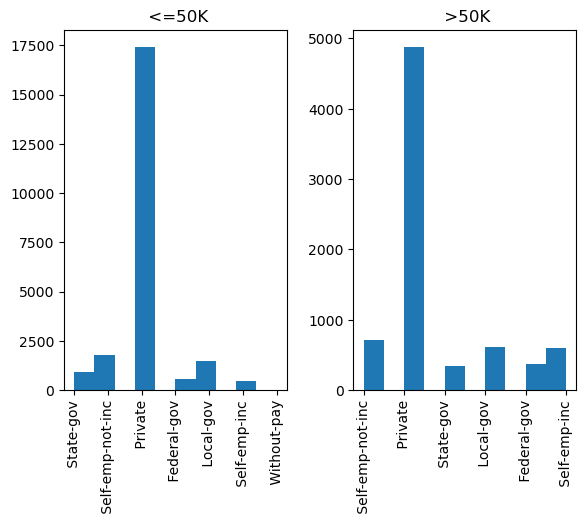

In [13]:
train.hist(column='workclass', by ='Salary')

In [14]:
# Test data

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [16]:
test.describe(include='all')

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,15060.000000,15060,15060,15060.000000,15060,15060,15060,15060,15060,15060.000000,15060.000000,15060.000000,15060,15060
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,11021,4943,NaN,6990,1992,6203,12970,10147,NaN,NaN,NaN,13788,11360
mean,38.768327,NaN,NaN,10.112749,NaN,NaN,NaN,NaN,NaN,1120.301594,89.041899,40.951594,NaN,NaN
std,13.380676,NaN,NaN,2.558727,NaN,NaN,NaN,NaN,NaN,7703.181842,406.283245,12.062831,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


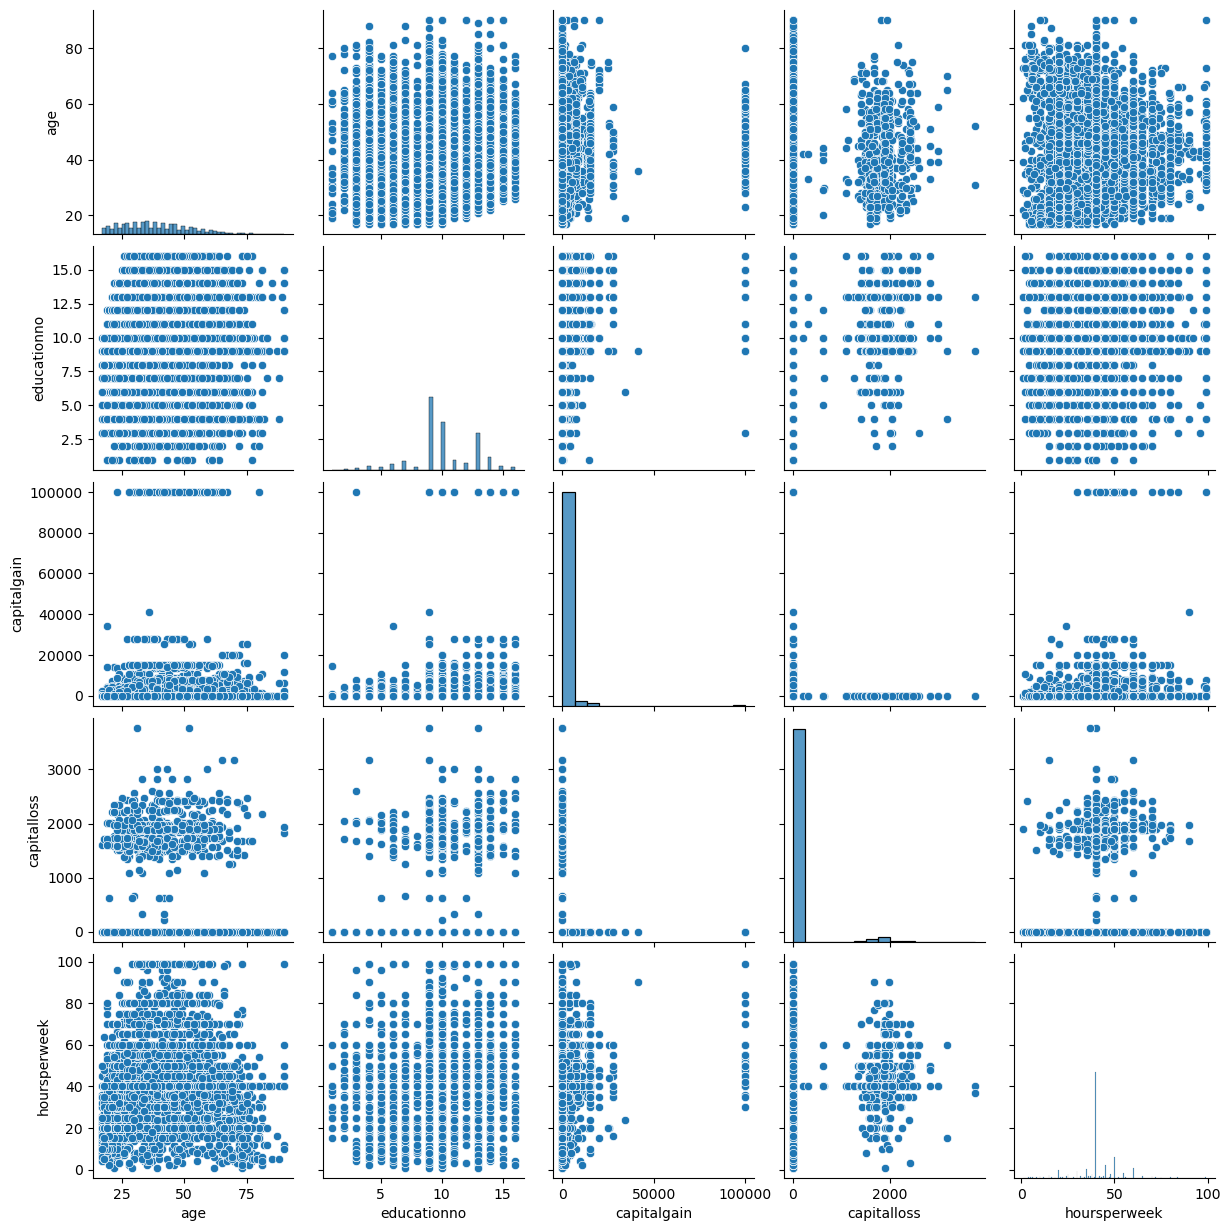

In [17]:
sns.pairplot(test)

In [18]:
test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

<Axes: xlabel='Salary', ylabel='count'>

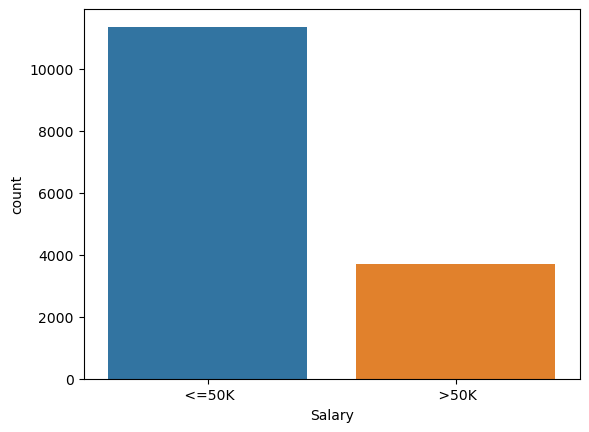

In [21]:
sns.countplot(x=test['Salary'])

array([<Axes: title={'center': ' <=50K'}>,
       <Axes: title={'center': ' >50K'}>], dtype=object)

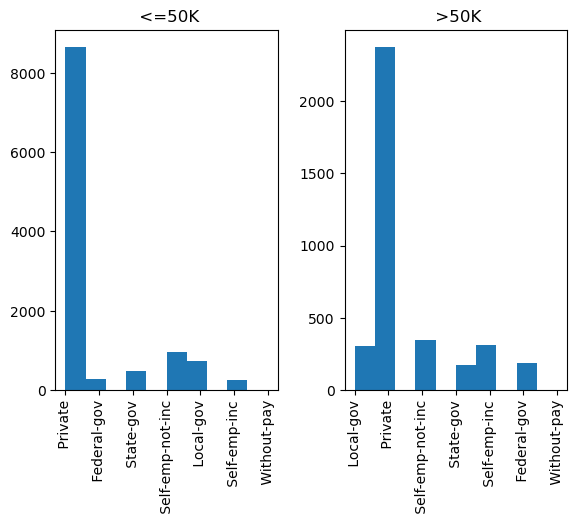

In [20]:
test.hist(column='workclass', by ='Salary')

In [22]:
oe = OrdinalEncoder()

train.iloc[:,[1,2,4,5,6,7,8,12]] = oe.fit_transform(train.iloc[:,[1,2,4,5,6,7,8,12]])

test.iloc[:,[1,2,4,5,6,7,8,12]] = oe.fit_transform(test.iloc[:,[1,2,4,5,6,7,8,12]])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6812\2656757943.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.iloc[:,[1,2,4,5,6,7,8,12]] = oe.fit_transform(train.iloc[:,[1,2,4,5,6,7,8,12]])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6812\2656757943.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.iloc[:,[1,2,4,5,6,7,8,12]] = oe.fit_transform(test.iloc[:,[1,2,4,5,6,7,8,12]])


## Spliting data

In [23]:
# train data
x = train.iloc[:,:-1]
y = train['Salary']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [24]:
# test data
a = train.iloc[:,:-1]
b = train['Salary']

## Model building

### MultinomialNB Model

In [25]:
# train data

In [26]:
nb_mul = MultinomialNB()

nb_mul.fit(xtrain, ytrain)
ypred = nb_mul.predict(xtest)

In [27]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

       <=50K       0.78      0.96      0.86      4464
        >50K       0.64      0.21      0.32      1569

    accuracy                           0.76      6033
   macro avg       0.71      0.59      0.59      6033
weighted avg       0.74      0.76      0.72      6033



In [28]:
print(confusion_matrix(ytest, ypred))

[[4279  185]
 [1234  335]]


In [29]:
nb_mul.score(xtrain, ytrain), nb_mul.score(xtest, ytest)

(0.7749502652519894, 0.764793635007459)

In [30]:
# Testing model on test data

In [31]:
test_pred = nb_mul.predict(a)

print(classification_report(b, test_pred))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.86     22653
        >50K       0.63      0.21      0.32      7508

    accuracy                           0.77     30161
   macro avg       0.71      0.59      0.59     30161
weighted avg       0.75      0.77      0.73     30161



In [32]:
print(confusion_matrix(b, test_pred))

[[21717   936]
 [ 5913  1595]]


In [33]:
nb_mul.score(xtrain, ytrain), nb_mul.score(a, b)

(0.7749502652519894, 0.7729186698053778)

## GaussianNB Model

In [34]:
# Train data

In [35]:
nb_gau = GaussianNB()

nb_gau.fit(xtrain, ytrain)
ypred1 = nb_gau.predict(xtest)

In [36]:
print(classification_report(ytest, ypred1))

              precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      4464
        >50K       0.70      0.33      0.45      1569

    accuracy                           0.79      6033
   macro avg       0.75      0.64      0.66      6033
weighted avg       0.77      0.79      0.76      6033



In [37]:
print(confusion_matrix(ytest, ypred1))

[[4237  227]
 [1050  519]]


In [38]:
nb_gau.score(xtrain, ytrain), nb_gau.score(xtest, ytest)

(0.79878149867374, 0.788330847008122)

In [39]:
# Testing model on test data

In [40]:
test_pred1 = nb_gau.predict(a)

print(classification_report(b, test_pred1))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88     22653
        >50K       0.69      0.33      0.45      7508

    accuracy                           0.80     30161
   macro avg       0.75      0.64      0.66     30161
weighted avg       0.78      0.80      0.77     30161



In [41]:
print(confusion_matrix(b, test_pred1))

[[21521  1132]
 [ 5000  2508]]


In [42]:
nb_gau.score(xtrain, ytrain), nb_gau.score(a, b)

(0.79878149867374, 0.7966910911441928)